In [3]:
import pandas as pd
#pd.set_option('display.max_rows',False)
pd.set_option('display.max_columns',None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('C:\\Users\\sdeep\\OneDrive\\Documents\\PGC AIML\\AusApparalSales4thQrt2020.csv')

In [5]:
df_working = df

In [8]:
sum_nulls = df_working.isnull().sum()
print(sum_nulls)

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [11]:
df_working.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [14]:
print(df_working['Date'].dtype)

object


In [18]:
df_working['Date'] = pd.to_datetime(df['Date'])
df_working['DateAlone'] = df_working['Date'].dt.day
#print(df_working['DateAlone'],'DateAlone')
df_working['Month'] = df_working['Date'].dt.month
#print(df_working['Month'])

In [20]:
df_working

,Date,Time,State,Group,Unit,Sales,DateAlone,Month
0,2020-10-01,Morning,WA,Kids,8,20000,1,10
1,2020-10-01,Morning,WA,Men,8,20000,1,10
2,2020-10-01,Morning,WA,Women,4,10000,1,10
3,2020-10-01,Morning,WA,Seniors,15,37500,1,10
4,2020-10-01,Afternoon,WA,Kids,3,7500,1,10
...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,30,12
7556,2020-12-30,Evening,TAS,Kids,15,37500,30,12
7557,2020-12-30,Evening,TAS,Men,15,37500,30,12
7558,2020-12-30,Evening,TAS,Women,11,27500,30,12


In [23]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(df_working[['Sales']])

df_working['Sales_scaled'] = mms.transform(df_working[['Sales']])
mms.fit(df_working[['Unit']])
df_working['Unit_scaled'] = mms.transform(df_working[['Unit']])

df_working.head()

,Date,Time,State,Group,Unit,Sales,DateAlone,Month,Sales_scaled,Unit_scaled
0,2020-10-01,Morning,WA,Kids,8,20000,1,10,0.095238,0.095238
1,2020-10-01,Morning,WA,Men,8,20000,1,10,0.095238,0.095238
2,2020-10-01,Morning,WA,Women,4,10000,1,10,0.031746,0.031746
3,2020-10-01,Morning,WA,Seniors,15,37500,1,10,0.206349,0.206349
4,2020-10-01,Afternoon,WA,Kids,3,7500,1,10,0.015873,0.015873


In [26]:
weekly_report = df_working.groupby(pd.Grouper(key='Date', freq='W')).agg({'Sales': 'sum'}).reset_index()
monthly_report = df_working.groupby(pd.Grouper(key='Date', freq='ME')).agg({'Sales': 'sum'}).reset_index()
print(weekly_report)
print(monthly_report)

         Date     Sales
0  2020-10-04  15045000
1  2020-10-11  27002500
2  2020-10-18  26640000
3  2020-10-25  26815000
4  2020-11-01  21807500
5  2020-11-08  20865000
6  2020-11-15  21172500
7  2020-11-22  21112500
8  2020-11-29  21477500
9  2020-12-06  29622500
10 2020-12-13  31525000
11 2020-12-20  31655000
12 2020-12-27  31770000
13 2021-01-03  13792500
        Date      Sales
0 2020-10-31  114290000
1 2020-11-30   90682500
2 2020-12-31  135330000


# DATA VISULAIZATION
## State-wise Sales Analysis

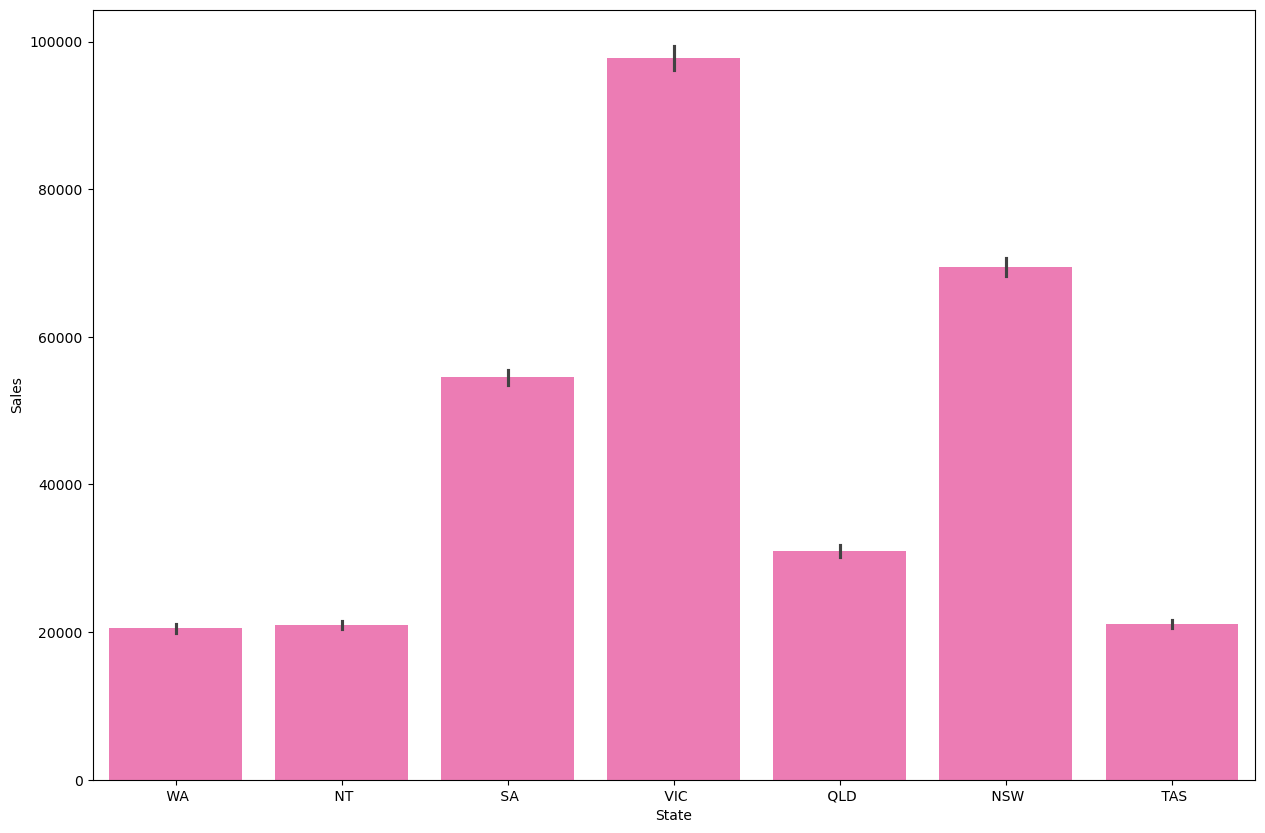

In [31]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df_working, x='State', y='Sales', color='Hotpink')
plt.show()

### Victoria and New South Wales are the most profitable states

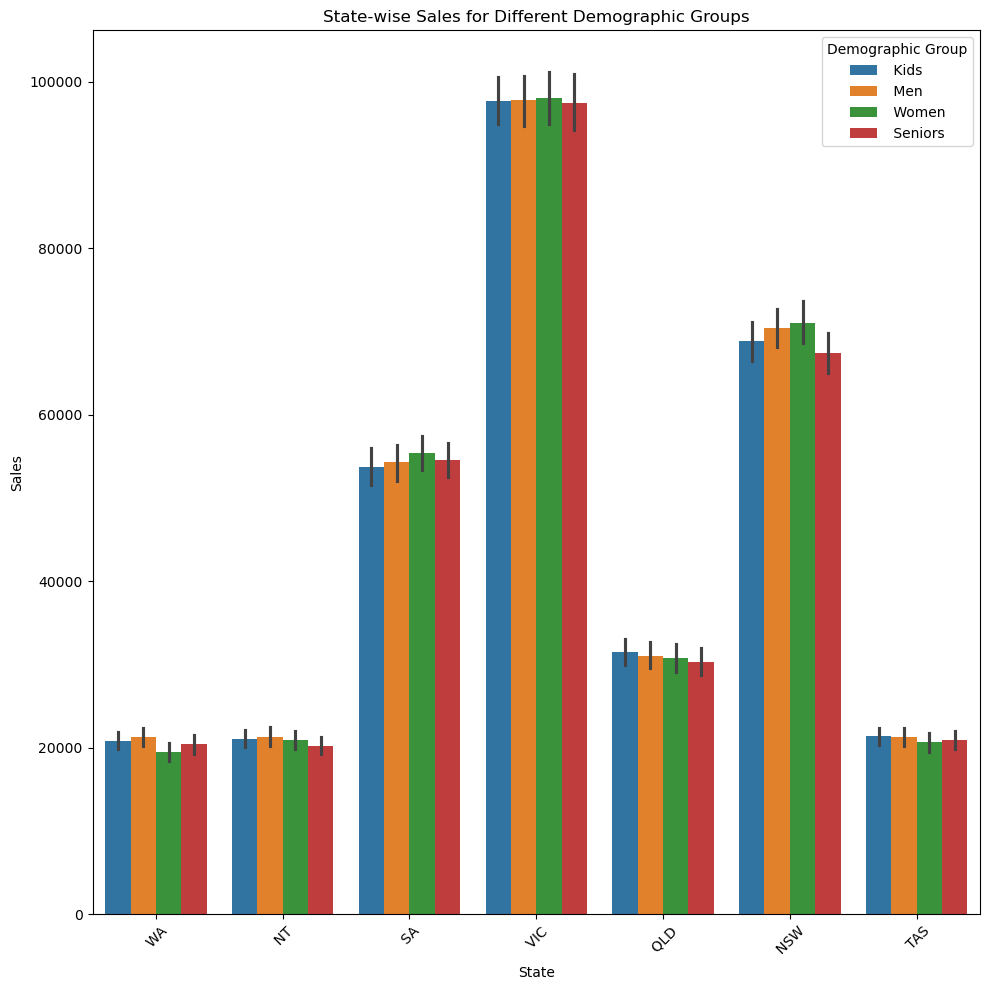

In [55]:
plt.figure(figsize=(10, 10))
sns.barplot(data=df_working, x='State', y='Sales', hue='Group')
#plt.show()
plt.title('State-wise Sales for Different Demographic Groups')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Demographic Group')
plt.show()

### Queensland has the most KIDS sales - An interesting fact

In [57]:
Just_avg = df_working.groupby('Group').Sales.mean()
print(Just_avg)

Group
Kids       45011.904762
Men        45370.370370
Seniors    44464.285714
Women      45207.671958
Name: Sales, dtype: float64


<Axes: xlabel='Group', ylabel='Sales'>

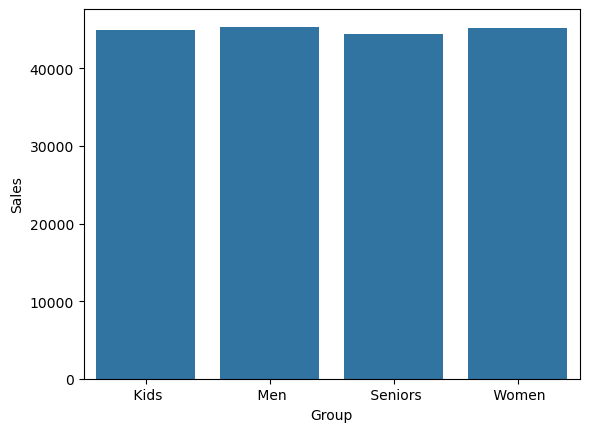

In [65]:
sns.barplot(Just_avg)

#### Grouping data according to the 'Time' to calculate total and average sales for each time category

In [70]:
time_analysis = df_working.groupby('Time')['Sales'].agg(['sum', 'mean']).reset_index()

time_analysis

,Time,sum,mean
0,Afternoon,114007500,45241.071429
1,Evening,112087500,44479.166667
2,Morning,114207500,45320.436508


In [76]:
time_analysis = time_analysis.sort_values('sum', ascending=False)
time_analysis

,Time,sum,mean
2,Morning,114207500,45320.436508
0,Afternoon,114007500,45241.071429
1,Evening,112087500,44479.166667


In [80]:
time_analysis.rename(columns={'sum': 'Total Sales', 'mean': 'Average Sales'}, inplace=True)
#for understanding of the S&M Team.
print(time_analysis)

         Time  Total Sales  Average Sales
2     Morning    114207500   45320.436508
0   Afternoon    114007500   45241.071429
1     Evening    112087500   44479.166667


## Morning is the peak sale period with an average amount of 45 thousand dollars
## Evenings have a slower pace ie, off-peak sale period

In [99]:
df_working['Date'] = pd.to_datetime(df_working['Date'])
#df_working['Date'].dtype

In [101]:
df_working['Date'].dtype

dtype('<M8[ns]')

In [103]:
daily_sales = df_working.groupby('Date')['Sales'].sum().reset_index()
print(daily_sales)

         Date    Sales
0  2020-10-01  3720000
1  2020-10-02  3715000
2  2020-10-03  3890000
3  2020-10-04  3720000
4  2020-10-05  3862500
..        ...      ...
85 2020-12-26  4715000
86 2020-12-27  4637500
87 2020-12-28  4595000
88 2020-12-29  4607500
89 2020-12-30  4590000

[90 rows x 2 columns]


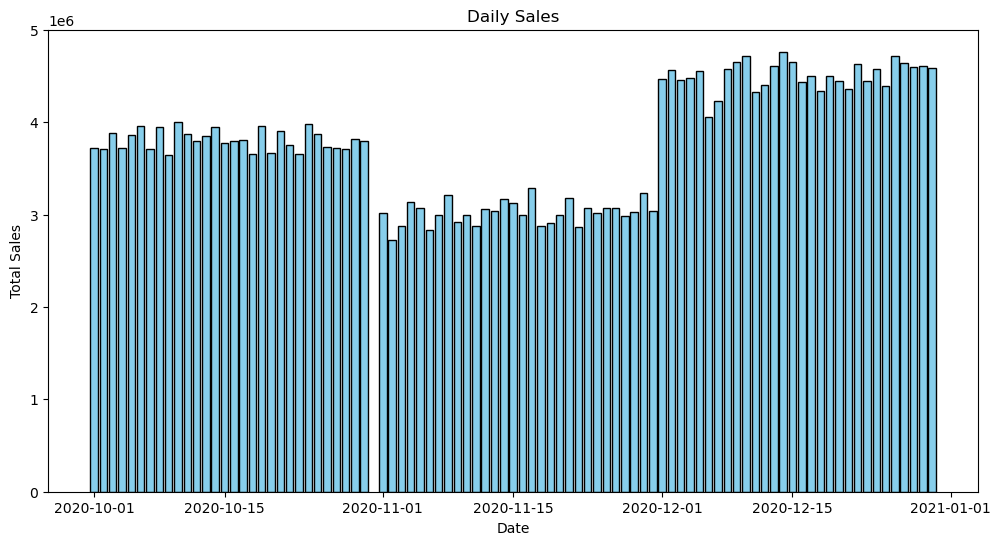

In [113]:
plt.figure(figsize=(12, 6))
plt.bar(daily_sales['Date'], daily_sales['Sales'], color='skyblue', edgecolor='black')
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
#plt.tight_layout()
plt.show()

In [120]:
print(daily_sales.max())

Date     2020-12-30 00:00:00
Sales                4765000
dtype: object


## Dec 30th is the highest earning date for AAL

In [124]:
df_working['Week'] = df_working['Date'].dt.isocalendar().week
print(df_working)

           Date        Time State     Group  Unit  Sales  DateAlone  Month  \
0    2020-10-01     Morning    WA      Kids     8  20000          1     10   
1    2020-10-01     Morning    WA       Men     8  20000          1     10   
2    2020-10-01     Morning    WA     Women     4  10000          1     10   
3    2020-10-01     Morning    WA   Seniors    15  37500          1     10   
4    2020-10-01   Afternoon    WA      Kids     3   7500          1     10   
...         ...         ...   ...       ...   ...    ...        ...    ...   
7555 2020-12-30   Afternoon   TAS   Seniors    14  35000         30     12   
7556 2020-12-30     Evening   TAS      Kids    15  37500         30     12   
7557 2020-12-30     Evening   TAS       Men    15  37500         30     12   
7558 2020-12-30     Evening   TAS     Women    11  27500         30     12   
7559 2020-12-30     Evening   TAS   Seniors    13  32500         30     12   

      Sales_scaled  Unit_scaled  Week  
0         0.095238     

Text(0, 0.5, 'Sales')

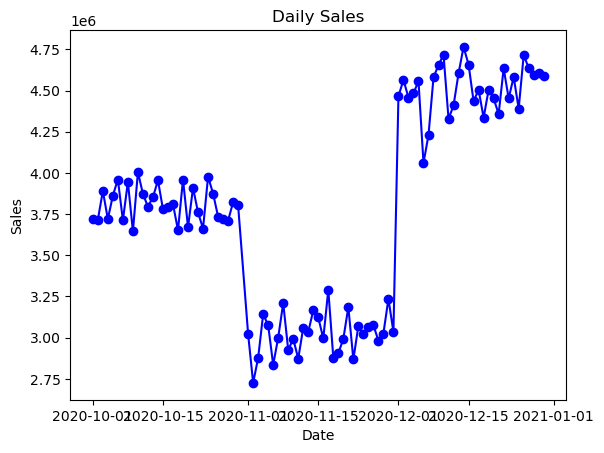

In [133]:
plt.plot(daily_sales['Date'], daily_sales['Sales'], marker='o', color='b')
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')

In [149]:
df_try = df_working

#df_working = pd.DataFrame(df_working).set_index('Week')

In [155]:
#df_try = pd.DataFrame(df_working).set_index('Week')
df_try

,Date,Time,State,Group,Unit,Sales,DateAlone,Month,Sales_scaled,Unit_scaled
Week,,,,,,,,,,
40,2020-10-01,Morning,WA,Kids,8,20000,1,10,0.095238,0.095238
40,2020-10-01,Morning,WA,Men,8,20000,1,10,0.095238,0.095238
40,2020-10-01,Morning,WA,Women,4,10000,1,10,0.031746,0.031746
40,2020-10-01,Morning,WA,Seniors,15,37500,1,10,0.206349,0.206349
40,2020-10-01,Afternoon,WA,Kids,3,7500,1,10,0.015873,0.015873
...,...,...,...,...,...,...,...,...,...,...
53,2020-12-30,Afternoon,TAS,Seniors,14,35000,30,12,0.190476,0.190476
53,2020-12-30,Evening,TAS,Kids,15,37500,30,12,0.206349,0.206349
53,2020-12-30,Evening,TAS,Men,15,37500,30,12,0.206349,0.206349


# Weekly Sales Bar Chart

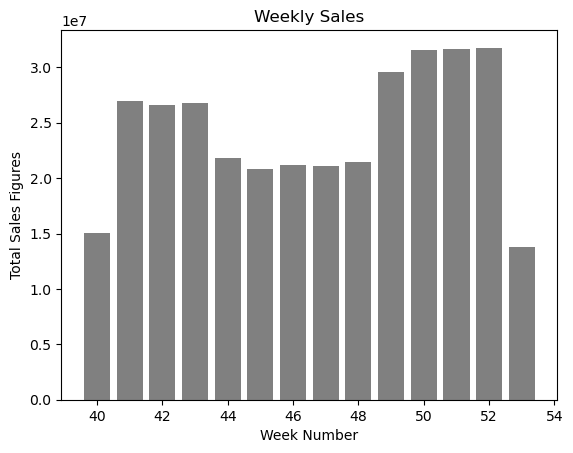

In [170]:
weekly_sales = df_working.groupby('Week')['Sales'].sum().reset_index()
plt.bar(weekly_sales['Week'], weekly_sales['Sales'], color='gray')
plt.title('Weekly Sales')
plt.xlabel('Week Number')
plt.ylabel('Total Sales Figures')

plt.show()


Text(0, 0.5, 'Sales')

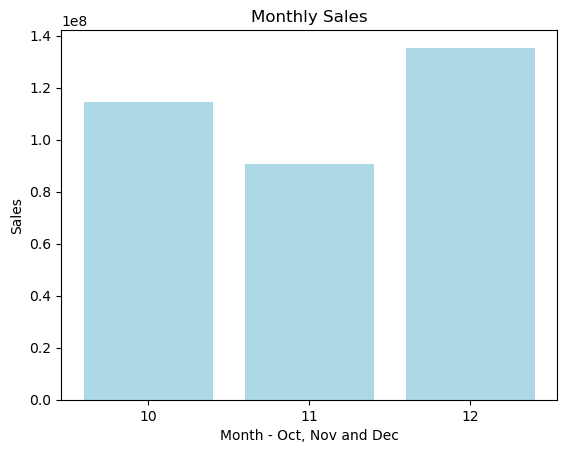

In [178]:
monthly_sales = df_working.groupby('Month')['Sales'].sum().reset_index()

plt.bar(monthly_sales['Month'].astype(str), monthly_sales['Sales'], color='lightblue')
plt.title('Monthly Sales')
plt.xlabel('Month - Oct, Nov and Dec')
plt.ylabel('Sales')

# Matplotlib is more easy and efficient to use.
# Bar plots are easy to interpret even for a non-technical person